In this Project we will be Implementing the following Steps :-

- Reading the data & Data Sanity Check
- Data Cleaning & Preparation
- EDA & Correlations
- Create the train & test data
- caling features
- Feature Selection
- Model Building
- Model Evaluation
- Model Prediction
- Model Summary

In [1282]:
#Importing the useful libraries & Warnings
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [1283]:
#Loading the Data and creating Dataframes

df_or = pd.read_csv("Lead Scoring Assignment/Leads.csv")

## Data Sanity Check

In [1284]:
df_or.shape

(9240, 37)

In [1285]:
df_or.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1286]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observations :-
1) There are 7 Numerical Columns.
2) Null values are there in most of the columns
3) There are certain columns which have 'Select' as value which is as good as null value so will replace them with null.

## Data Cleaning & Preparation

In [1287]:
#Replacing 'Select' value with null, Also preserve original Dataframe and will make changes to working Dataframe

df_wk = df_or.replace('Select', np.nan)

In [1288]:
#Take % of null values in each column and storing it as an object
df_wk_Null = df_wk.isnull().mean()*100

#Dropping the columns where % of Null value is greater than 40% 
col_to_drop = list(df_wk_Null[df_wk_Null > 40].index)
#col_to_drop
df_wk.drop(columns=col_to_drop, axis=1,inplace=True)

df_wk.shape

(9240, 30)

#### 7 columns have been dropped where in the % of Null values were more than 40%, bringnig down the number of columns to 30 from 37

In [1289]:
#Checking top 10 columns containing highest % of Null values in the reduced DataFrame
#This is to understand if there are still any columns whose high Nan values might impact the analysis

df_wk.isnull().mean().sort_values(ascending=False).head(10)

City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
dtype: float64

In [1290]:
#City Also has very high null values and doesnt look like adding much value to the overall analysis so will drop City
# If City is Dropped then Coutry also will not add any value in the whole analysis, so will drop that also

df_wk.drop(columns=['City','Country'], axis=1,inplace=True)

In [1291]:
# Drop Lead Number column also as it's irrelevant for the analysis
df_wk.drop(columns=['Lead Number','Prospect ID'], axis=1,inplace=True)

#Drop the below columns as they are entered by the team after interacting with the customer
df_wk.drop(columns=['Tags','Last Notable Activity'], axis=1,inplace=True)

#### Checking Data Imbalance

In [1292]:
# Check the value counts of variables which has only Yes or No as values

# Creating list of such columns
cols=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' ]  


for i in cols:
    print('Value Counts in Col : ',i)
    print(df_wk[i].value_counts(), '\n')

Value Counts in Col :  Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Value Counts in Col :  Search
No     9226
Yes      14
Name: Search, dtype: int64 

Value Counts in Col :  Magazine
No    9240
Name: Magazine, dtype: int64 

Value Counts in Col :  Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

Value Counts in Col :  X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64 

Value Counts in Col :  Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64 

Value Counts in Col :  Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

Value Counts in Col :  Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64 

Value Counts in Col :  Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64 

Value Counts in Col :  Update me on Supply Chain Content
No    9240
Name: Update me o

In [1293]:
#Drop the above columns as they are highly Imbalanced and skewed towards 'NO'

df_wk.drop(columns=cols, axis=1,inplace=True)

In [1294]:
df_wk.shape

(9240, 12)

In [1295]:
### Checking the columns having lower than 15% Null values and might require treatment

df_wk_temp= df_wk.loc[:, ( df_wk_Null < 15)]
df_wk_temp.isnull().sum().sort_values(ascending=False).head(10)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
A free copy of Mastering The Interview      0
dtype: int64

In [1296]:
df_wk_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


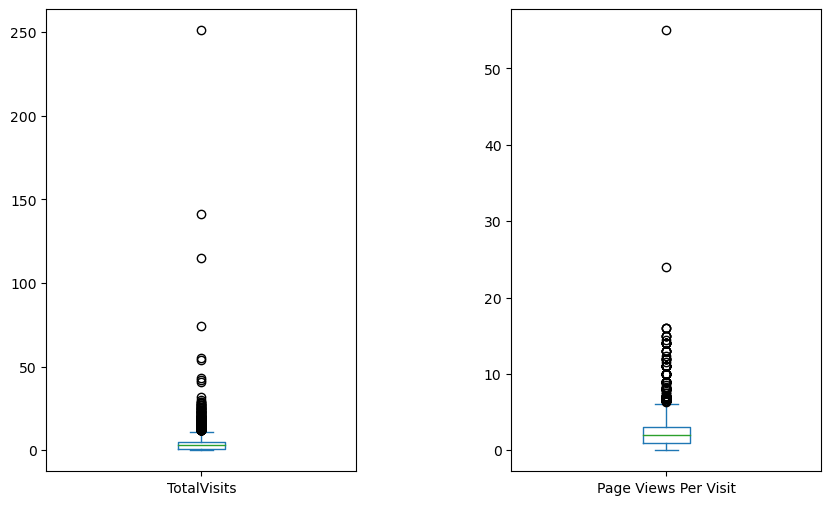

In [1297]:
##Check if their are outliers for TotalVisits & Page Views Per Visit as they are continous
## if yes then we will have to use median to fill Null

df_wk_temp.plot(column=("TotalVisits","Page Views Per Visit"), kind='box', subplots=True, sharey=False,figsize=(10, 6))
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()


In [1298]:
## TotalVisits & Page Views Per Visit as they are continous so we will have to use median to fill Null
##Last Activity & Lead Source are categorical so we will have to use Mode to fill Null

df_wk.TotalVisits.fillna( df_wk.TotalVisits.median(),inplace = True)
df_wk['Page Views Per Visit'].fillna( df_wk['Page Views Per Visit'].mode()[0],inplace = True)
df_wk['Last Activity'].fillna( df_wk['Last Activity'].mode()[0],inplace = True) 
df_wk['Lead Source'].fillna( df_wk['Lead Source'].mode()[0],inplace = True) 


In [1299]:
# Checking Outliers for Continous variables
list(df_wk.select_dtypes(['int64','float64']).columns)


['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

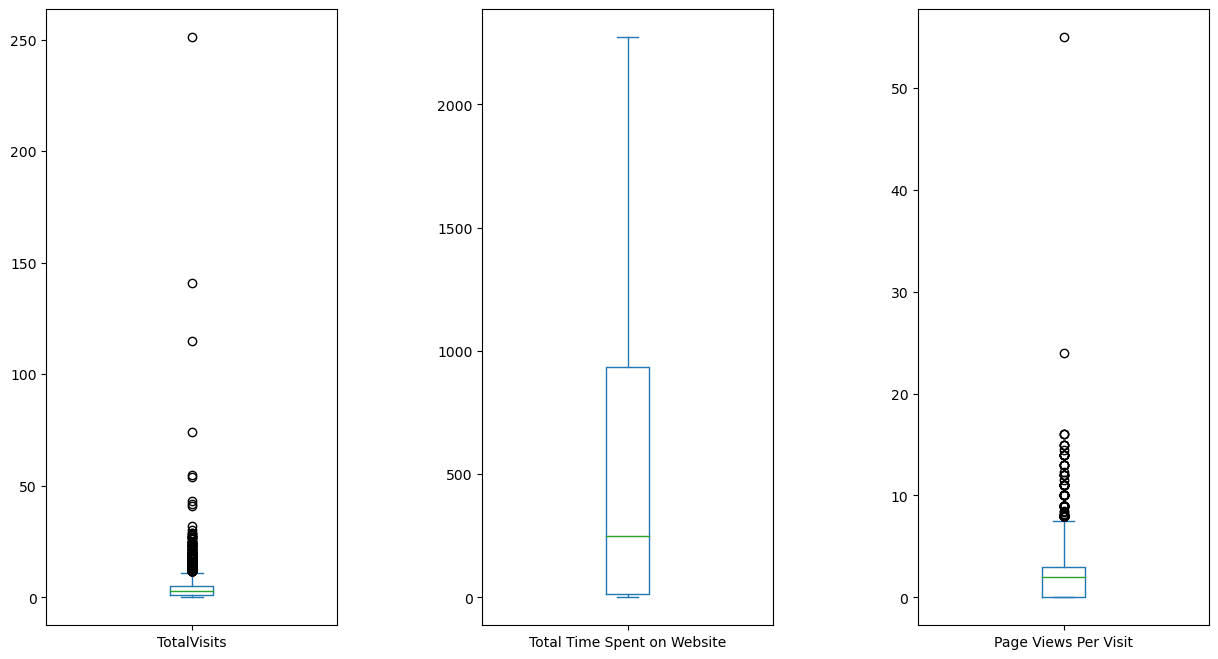

In [1300]:
# Creating Boxplots for checking the outliers
df_wk.plot(column= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], kind='box', subplots=True, sharey=False,figsize=(15,8))
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

TotalVisits and 'Page Views per Visit' clearly have outliers at top end and needs treatment.

In [1301]:
# Checking for outliers in the continuous variables
num_df = df_wk[['TotalVisits', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.327787
std,4.819024,2.164258
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000
99%,17.000000,9.000000


As Observed in the above table till 99 percentile the figures are growing gradually but post 99% it shot up steeply

In [1302]:
# Will remove the outliers and values above 99 percentile

top_cutoff1 = df_wk.TotalVisits.quantile(0.99)
df_wk = df_wk[(df_wk.TotalVisits <= top_cutoff1)]

top_cutoff2 = df_wk['Page Views Per Visit'].quantile(0.99)
df_wk = df_wk[(df_wk['Page Views Per Visit'] <= top_cutoff2)]


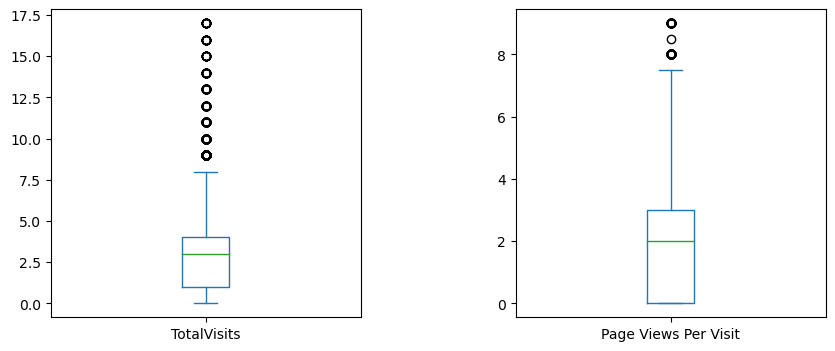

In [1303]:
# Creating Boxplots for checking the outliers scenario once again
df_wk.plot(column= ['TotalVisits','Page Views Per Visit'], kind='box', subplots=True, sharey=False,figsize=(10,4))
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

## EDA

### Univariate Analysis

In [1304]:
df_wk.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
A free copy of Mastering The Interview            object
dtype: object

In [1305]:
colors = sns.color_palette('rocket')
                
# Create a customised function to create bar plot for categorical columns, along with formatting & size in one go
def bargraph(col, rot_req = False, narrow = True):
    df_wk_values = round(df_wk[col].value_counts(normalize = True)*100,1).sort_values(ascending = False)
    groupby_plot = round(df_wk.groupby(df_wk[col]).mean().Converted*100,1).sort_values(ascending=False)
    
    
    if narrow :
        plt.figure(figsize=[15,7])
        x = df_wk_values.index
        y = df_wk_values.values
        plt.subplot(1,2,1)
        ax=sns.barplot(x=x,y=y, order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Lead Contribution %")
        plt.title("Total Cases",pad=2)
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)  
    
        x = groupby_plot.index
        y = groupby_plot.values
        plt.subplot(1,2,2) 
        ax=sns.barplot(x=x,y=y, order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Positive Conversion %")
        plt.title("Positive Converted Cases",pad=2)    
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()
        
        
    else:
        plt.figure(figsize=[20,30])
        x = df_wk_values.index
        y = df_wk_values.values
        plt.subplot(2,1,1)
        ax=sns.barplot(x = x, y = y,order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Lead Contribution %")
        plt.title("Total Cases",pad=2)  
        for i, v in enumerate(df_wk_values.values):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)    
        
        x = groupby_plot.index
        y = groupby_plot.values
        plt.subplot(2,1,2)
        ax=sns.barplot(x = x, y = y,order=x, palette= colors)
        plt.xlabel(col)
        plt.ylabel("Positive Conversion %")
        plt.title("Positive Converted Cases",pad=2)  
        for i, v in enumerate(y):
           ax.text(i, v/2, str(v)+"%", ha='center', color='white')
        if rot_req:
            plt.xticks(rotation = 90)
        plt.show()


In [1306]:
list(df_wk.select_dtypes(['object']).columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview']

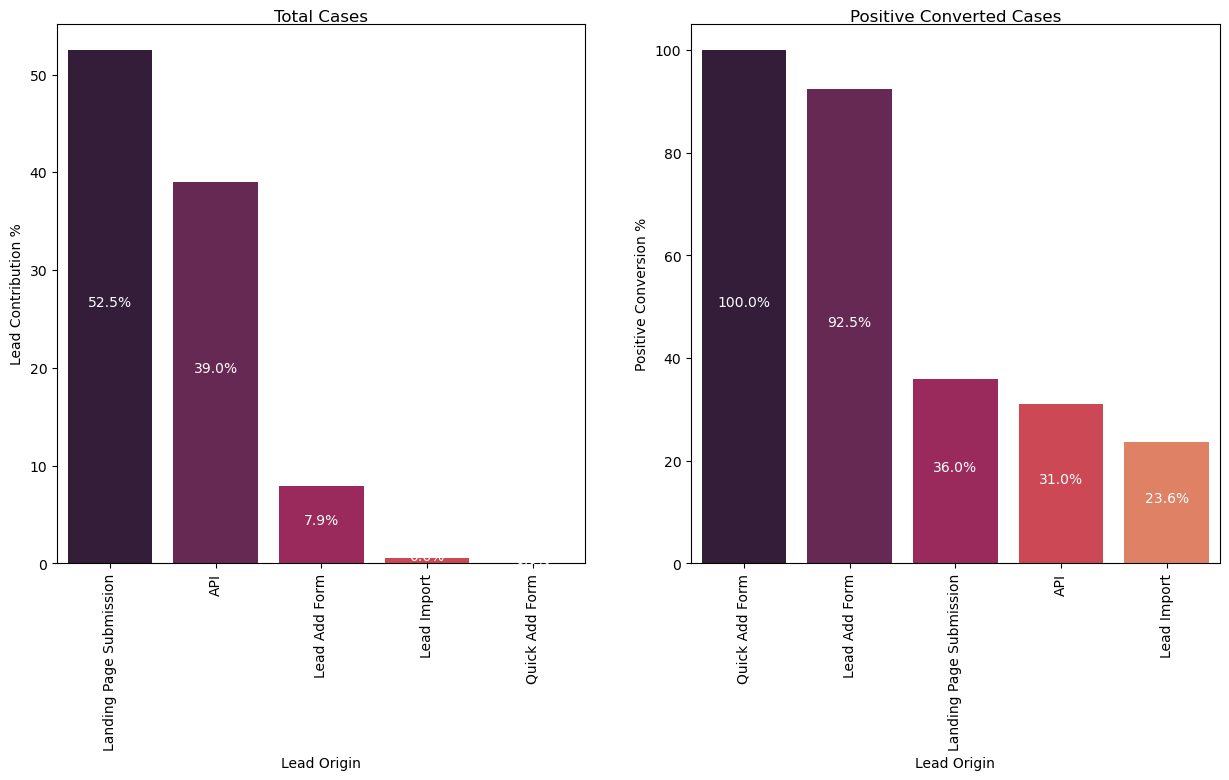

In [1307]:
#Analysing Lead Origin
bargraph('Lead Origin', rot_req = True)

#### Observation : 
- Highest Number of Leads originate from Landing Page , followed by API.
- Though the leads originating from Lead Add Form & Quick Add Form are low but the conversion for them is very high.

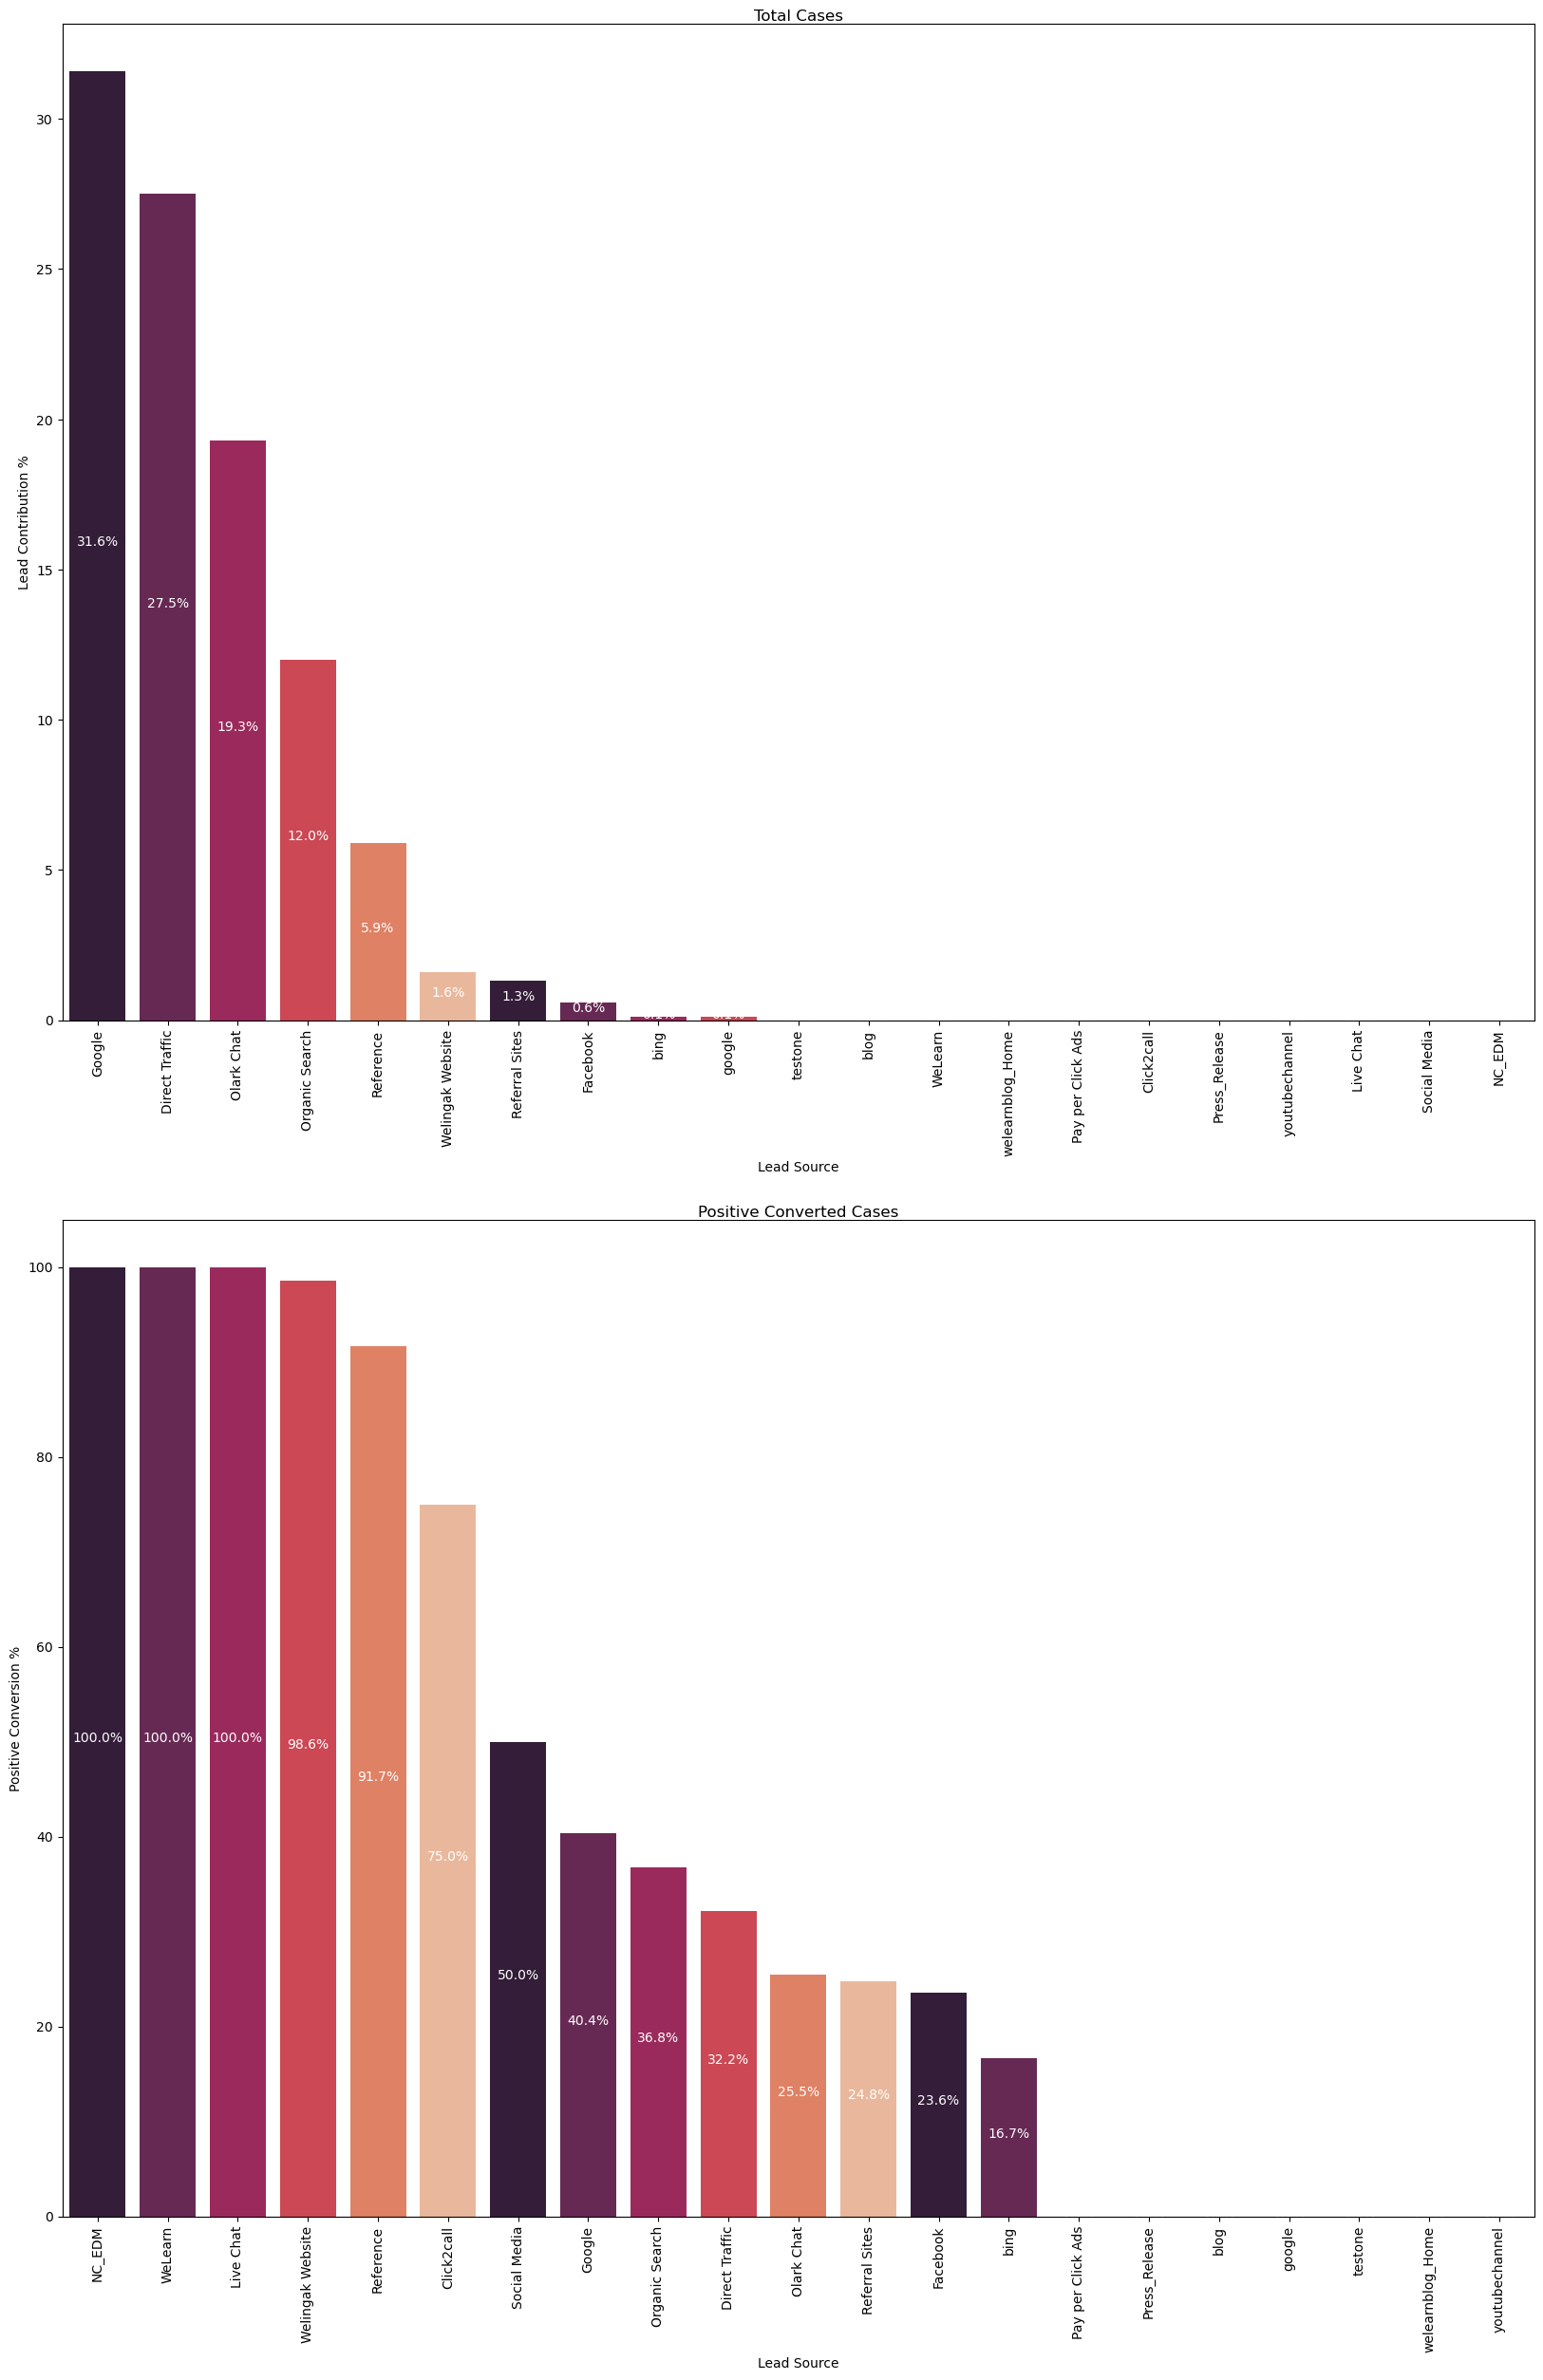

In [1308]:
#Analysing Lead Source
bargraph('Lead Source', rot_req = True, narrow=False)

### Observation :
- Only 3 sources (Google, Direct Traffic and Olarkchat) Contributes of 80% of total leads generated.
- Though the Contribution of NC_EDM, WeLearn, Livechat and Welingak Website in the overall leads is very lowe but there conversion is 100% and is a sure shot conversion case. 

In [1309]:
 'Last Activity'

'Last Activity'

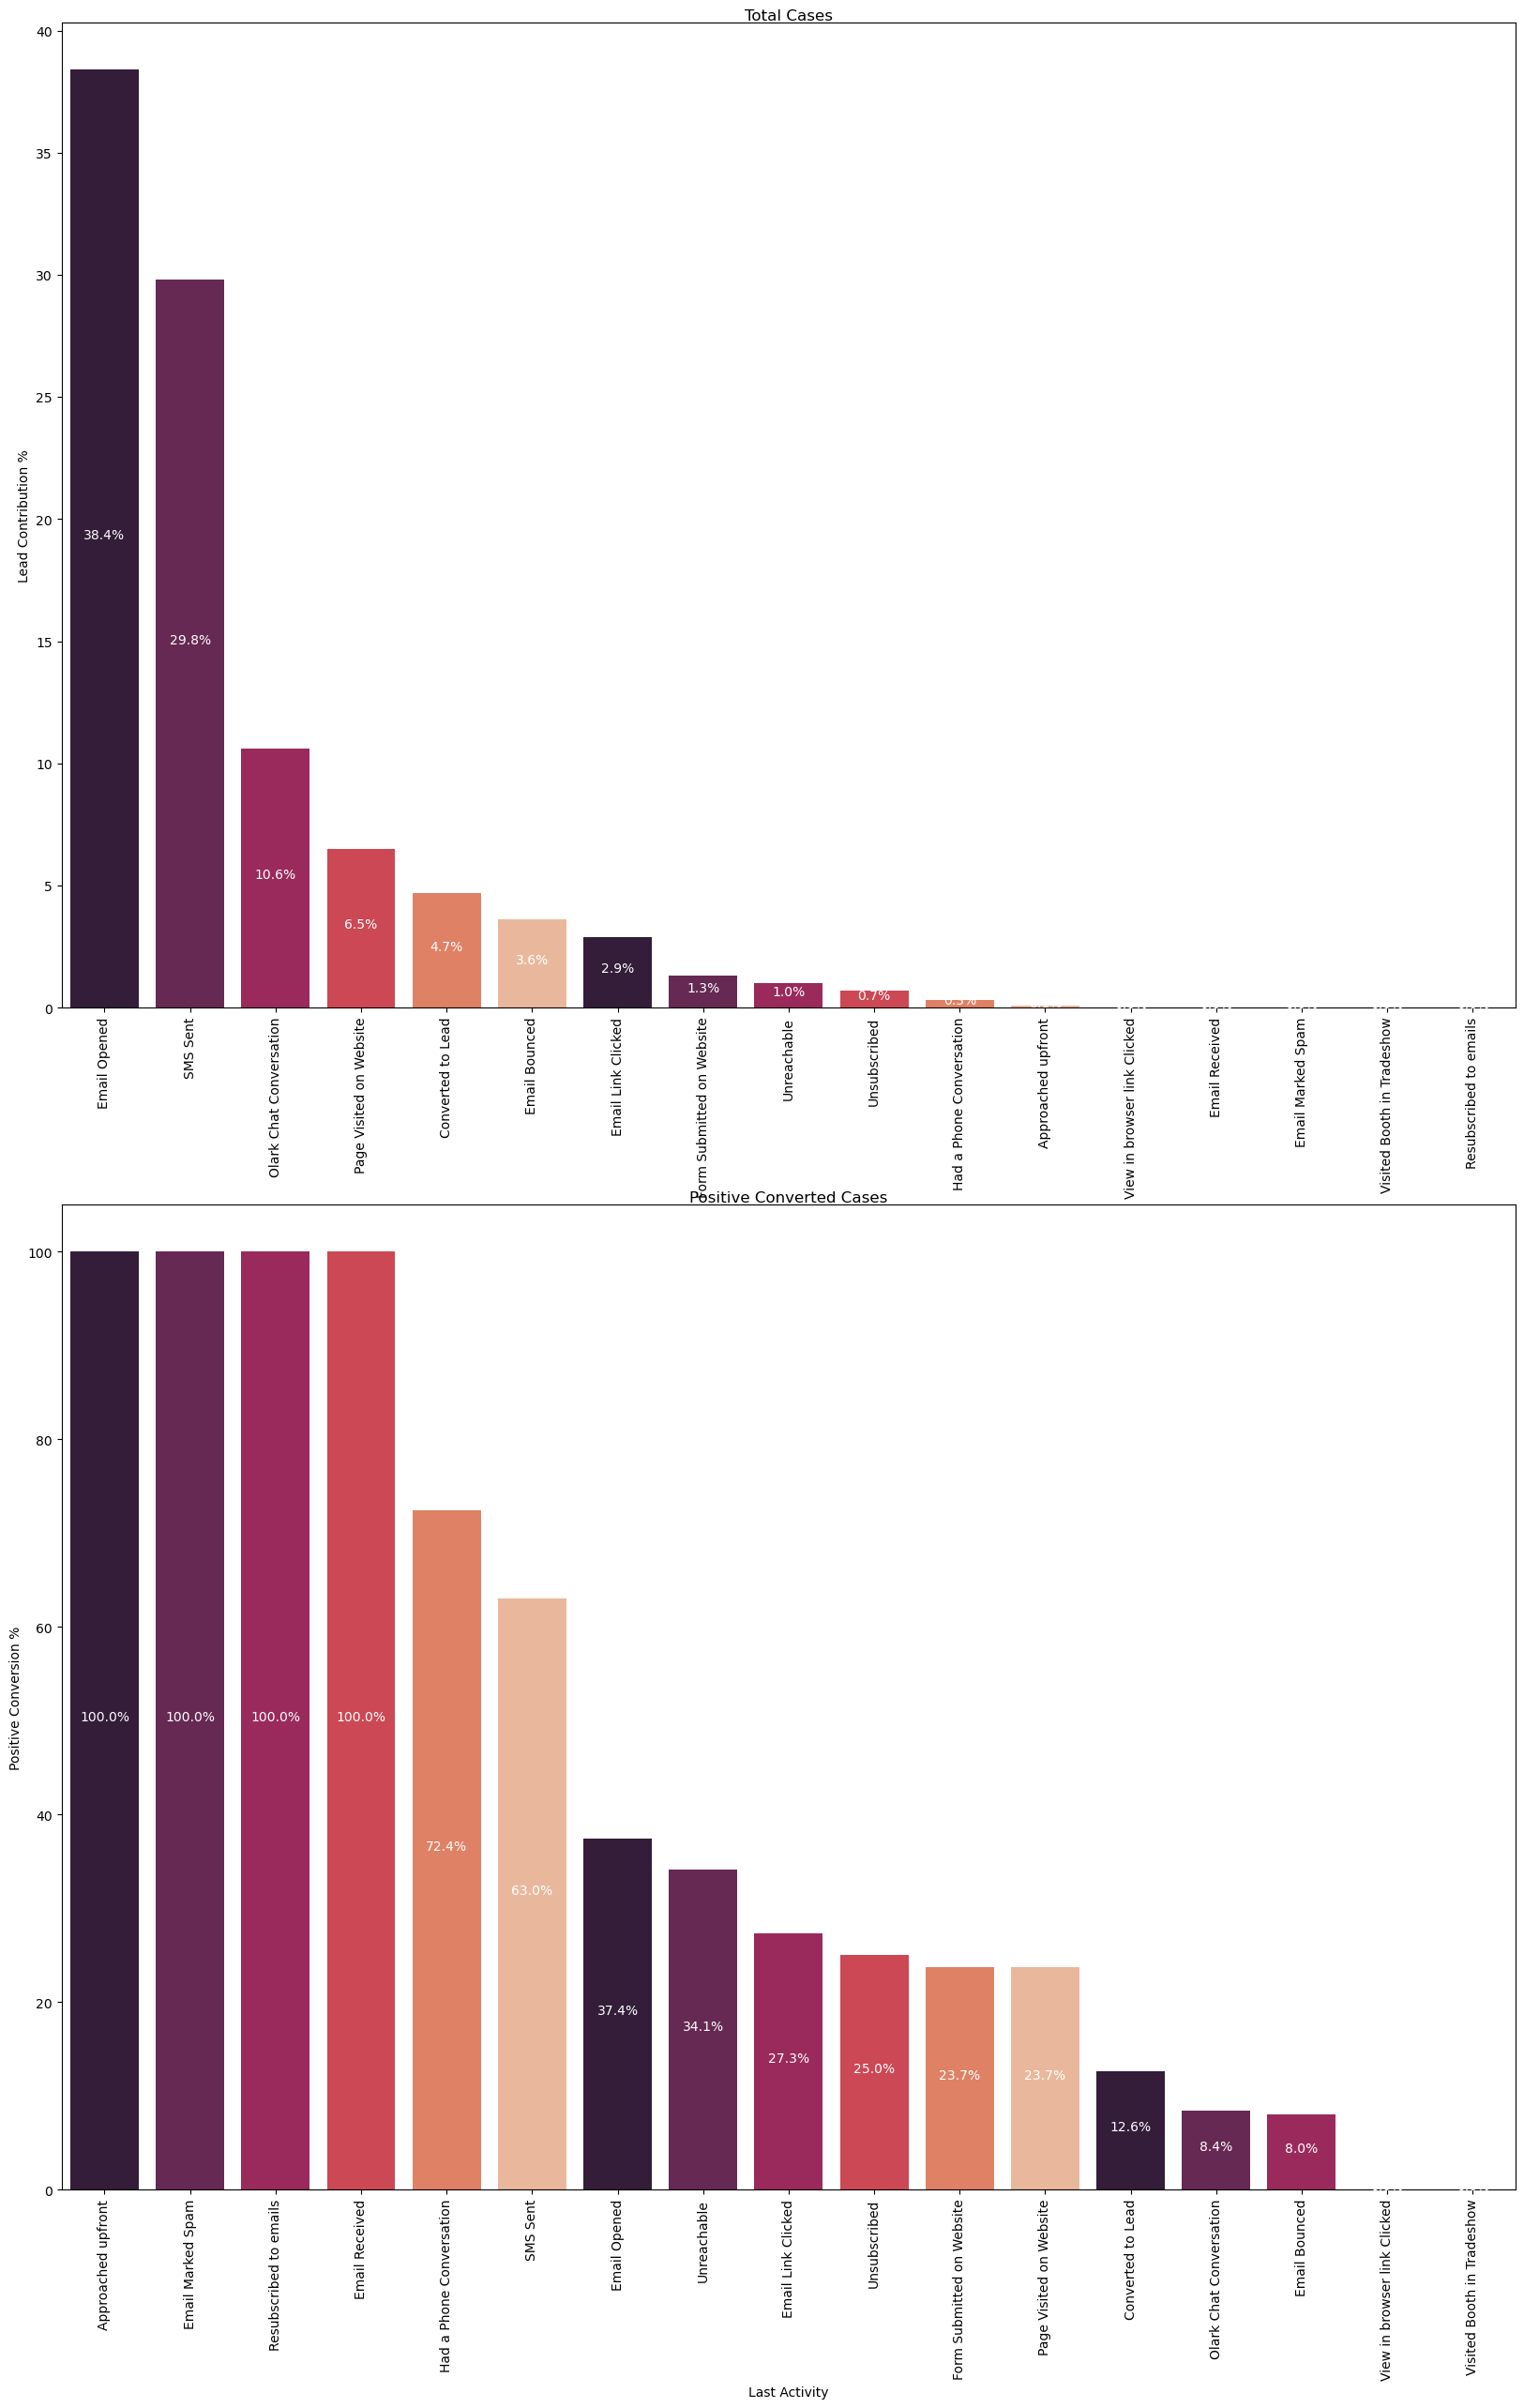

In [1310]:
#Analysing  'Last Activity'
bargraph( 'Last Activity', rot_req = True, narrow=False)

### Observation :-
- 80% of the total leads generated have Email Open, SMS Sent and Chat Conversion as their last activity.
- Approached Upfront, Email Marked Spam, Resubscribed to emails, email Received as their last activity has 100% Conversion.

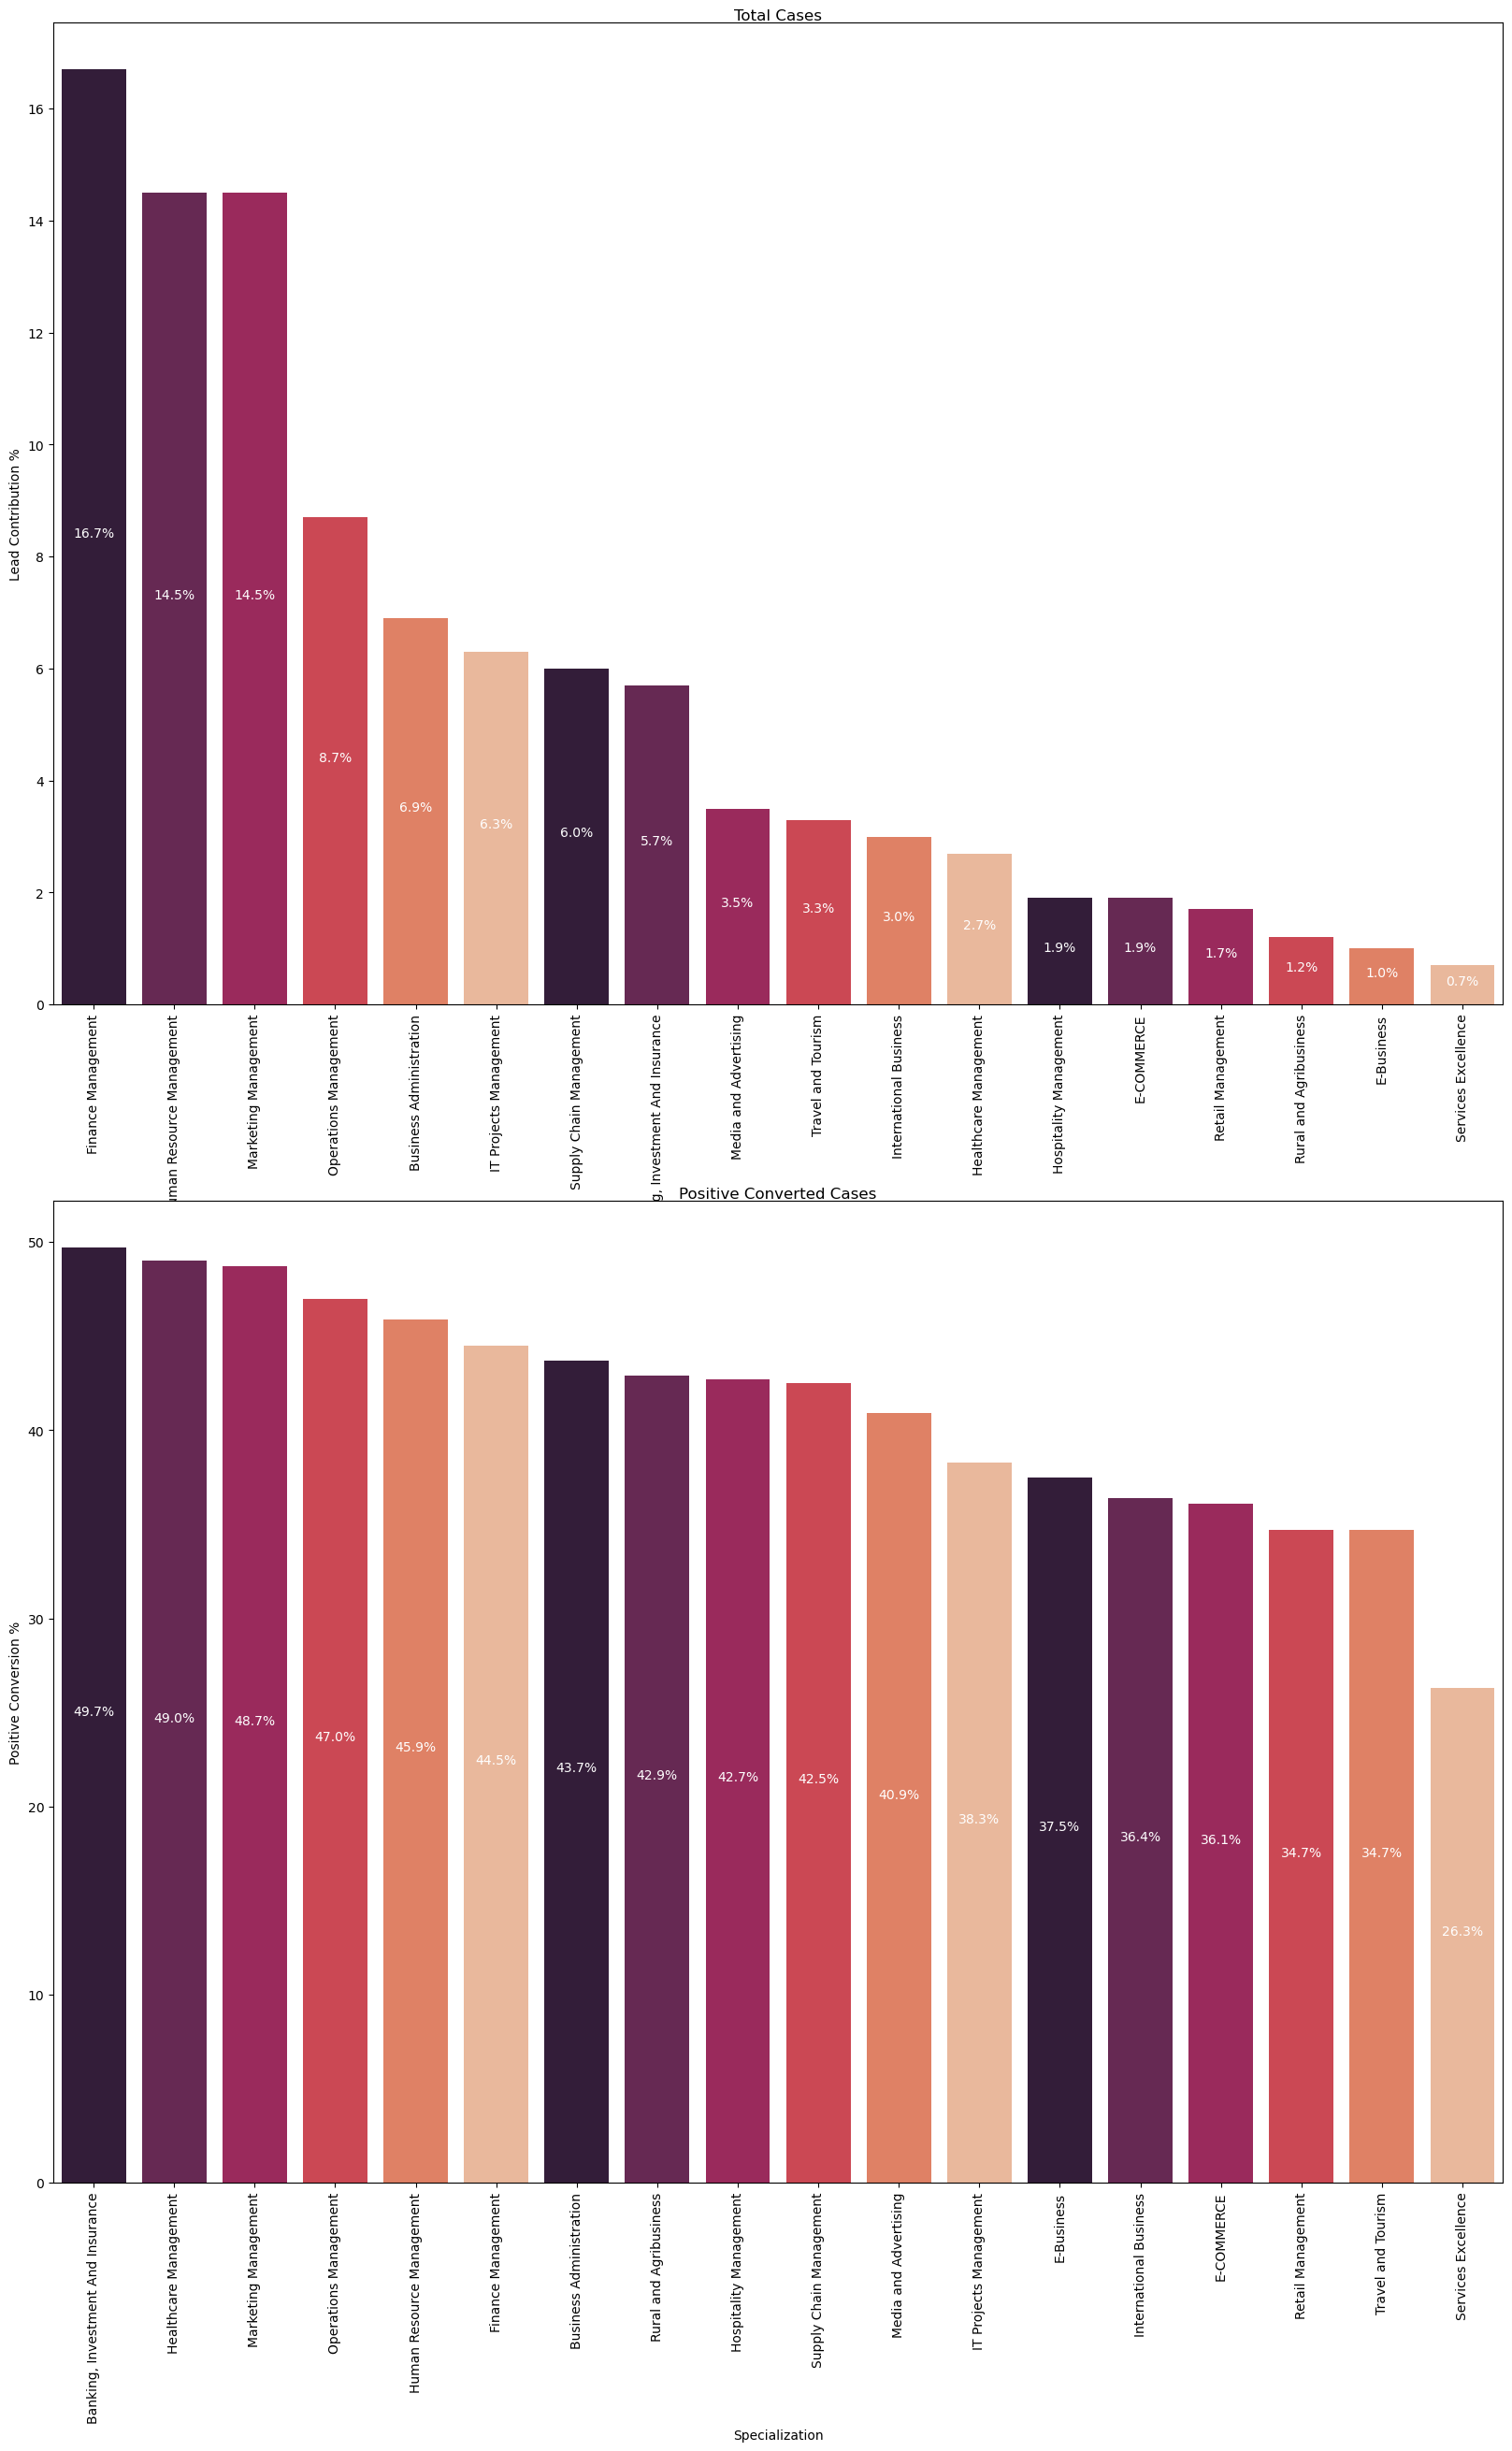

In [1311]:
#Analysing  'Specialization'
bargraph( 'Specialization', rot_req = True, narrow=False)

### Observation :-
- Finance, HR, Marketing, Operations and Business management are the top 5 courses for which they get the leads.
- Banking.. , healthcare and Marketing management have highest conversion of around 50%. Services Excellence has the lowest conversion %.

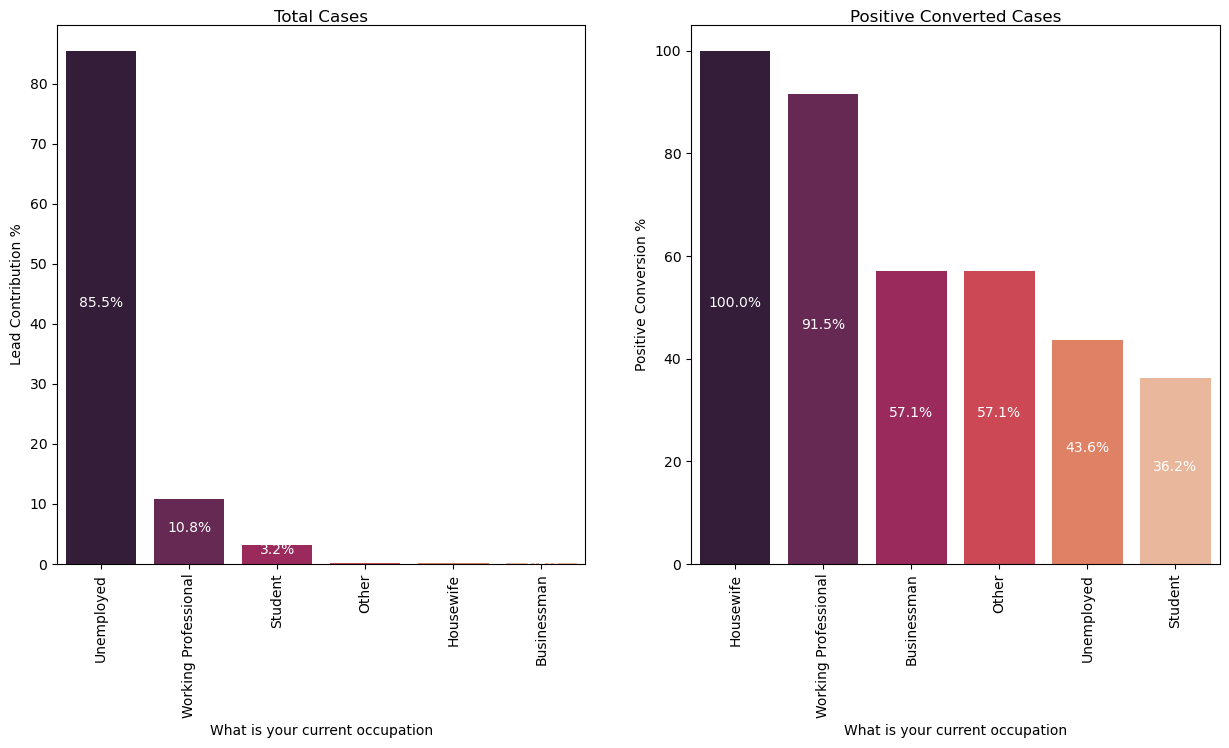

In [1312]:
#Analysing  'What is your current occupation'
bargraph( 'What is your current occupation', rot_req = True)

### Observation :-
- Highest leads are received from Unemployed Customers and it's logical that they want to upskill to be employed.
- Conversion for Housewife is highest @100%, probable reason might be that they have time and would like to start employement.
- Conversion of Working Professional is second highest for rising up in corporate ladder , change the vertical etc.

### Bivariate Analysis 

<Figure size 2000x1500 with 0 Axes>

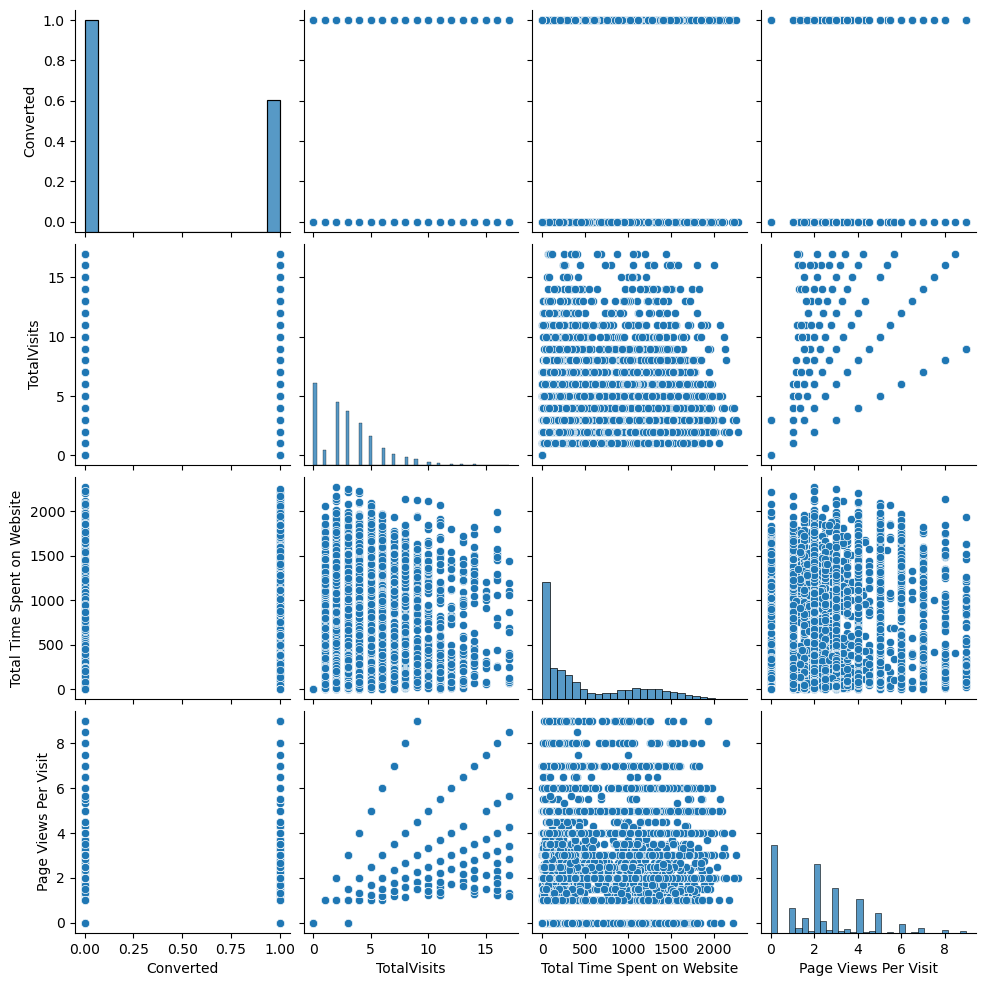

In [1313]:
#Using Pair Plots to conduct Bivariate analysis between two continous variables

## Using pair Plot for working data frame
plt.figure(figsize=(20,15))
df_wk_numcol = df_wk[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].fillna(0)
sns.pairplot(df_wk_numcol)

plt.show()

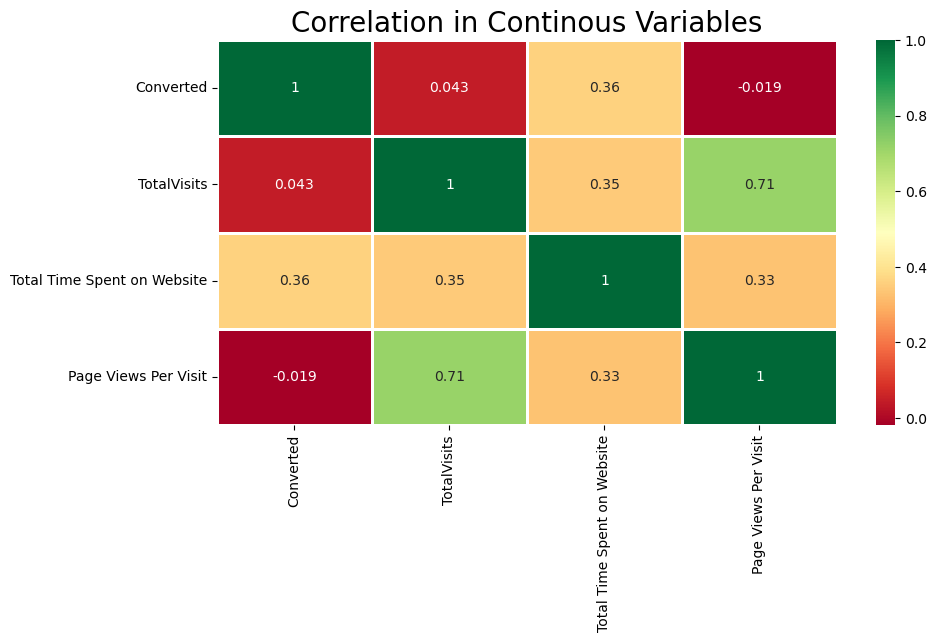

In [1314]:
# create Heatmap to visualize the correlation between continous variables
plt.figure(figsize = [10,5])
sns.heatmap(df_wk_numcol.corr(), annot= True, cmap= "RdYlGn", linewidths=2)
plt.title("Correlation in Continous Variables",fontdict={"fontsize": 20} )
plt.show()

### Observation :-
- with Both pair Plot and heat map we can see that the : Page Views Per Visit and Total Visits are co-related and with increase in one feature the other also shows an increasing trend, which is logical.

## Create Train and Test Data

In [1315]:
## Checking Structure of Dataframe once again 
df_wk.shape

(9090, 12)

In [1316]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9090 non-null   object 
 1   Lead Source                                    9090 non-null   object 
 2   Do Not Email                                   9090 non-null   object 
 3   Converted                                      9090 non-null   int64  
 4   TotalVisits                                    9090 non-null   float64
 5   Total Time Spent on Website                    9090 non-null   int64  
 6   Page Views Per Visit                           9090 non-null   float64
 7   Last Activity                                  9090 non-null   object 
 8   Specialization                                 5730 non-null   object 
 9   What is your current occupation                6440 

#### Converting some binary variables (Yes/No) to 0/1

In [1317]:
varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_wk[varlist] = df_wk[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1318]:
# Listing Categorical Columns
cat_cols= df_wk.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [1319]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df_wk[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview']], drop_first=True) 
                               
# Add the results to the master dataframe
df_wk = pd.concat([df_wk, dummy], axis=1)

# Drop the columns for which Dummy is created

df_wk = df_wk.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],1)

In [1320]:
df_wk.shape

(9090, 70)

## Creating Test-Train Split

In [1321]:
# Import the required library

from sklearn.model_selection import train_test_split

# Put all the feature variables in X

# Putting target variable in y
y = df_wk['Converted']

X=df_wk.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1322]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1323]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes
302,0,0.411765,0.110035,0.258889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,0.294118,0.206866,0.555556,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7656,1,0.352941,0.154930,0.666667,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3241,0,0.235294,0.428257,0.147778,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [1324]:
### Checking the Conversion rate
Converted = (sum(df_wk['Converted'])/len(df_wk['Converted'].index))*100
Converted

38.448844884488445

#### We have almost 38% Conversion rate 

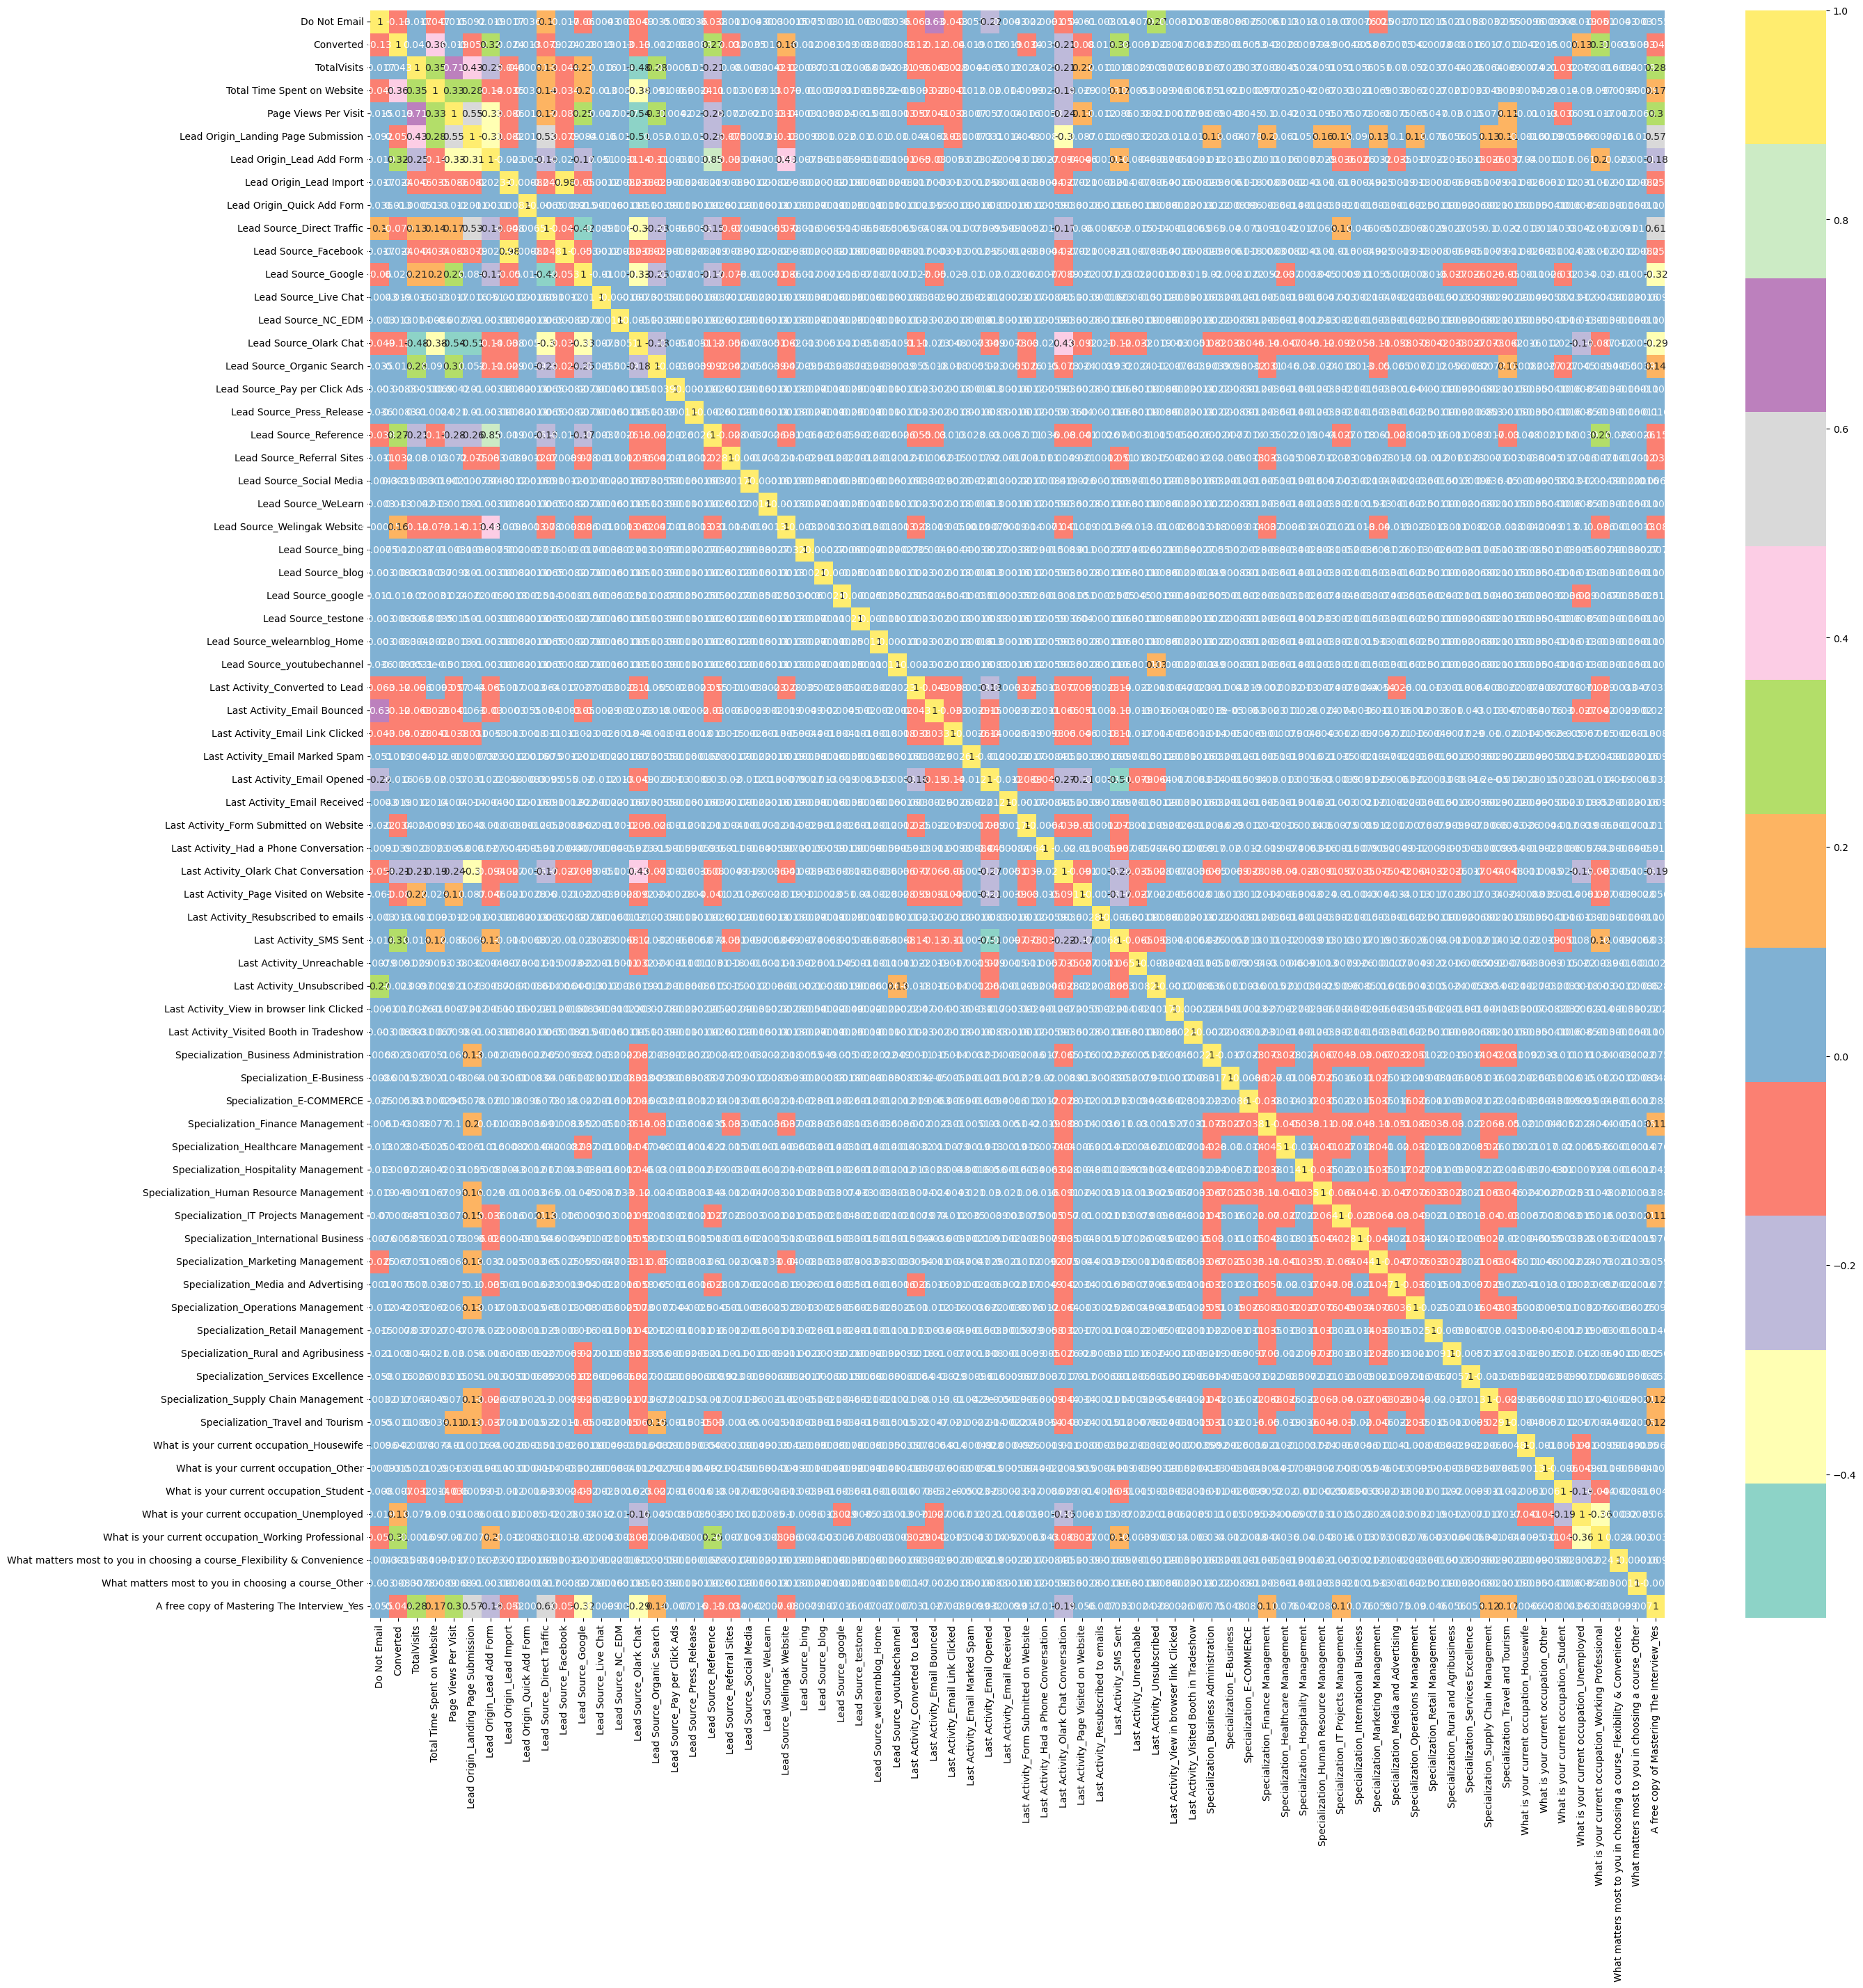

In [1325]:
# Let's see the correlation matrix for total data set
plt.figure(figsize = (30,30))       
sns.heatmap(df_wk.corr(),annot = True,cmap='Set3')
plt.show()

#### There is no high corelated variables found

## Building Model

In [1326]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1327]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=12)            # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [1328]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 42),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 55),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 56),
 ('Lead Source_google', False, 32),
 ('Lead S

In [1329]:
col = X_train.columns[rfe.support_]

In [1330]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'L

In [1331]:
X_train_rfe = X_train[col]

### Manual Feature Elimination

### Model-1

In [1332]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [1333]:
# Running the first model with all features selected after RFE

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.9
Date:                Tue, 16 Apr 2024   Deviance:                       5417.7
Time:                        04:46:52   Pearson chi2:                 7.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3801
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4643      0.073    -33.639      0.000      -2.608      -2.321
Do Not Email                                            -1.6578      0.176     -9.410      0.000      -2.003      -1.312
Total Time Spent on Website                              4.5420      0.163     27.783      0.000       4.222       4.862
Lead Origin_Lead Add Form                                3.6562      0.196     18.628      0.000       3.271       4.041
Lead Source_Olark Chat                                   1.1959      0.102     11.691      0.000       0.995       1.396
Lead Source_Welingak Website                             2.8677      1.027      2.791      0.005       0.854       4.881
Last Activity_Had a Phone Conversation                   1.8187      0.663      2.743      0.006       0.519       3.118
Last Activity_Olark Chat Conversation                   -1.3551      0.160     -8.491      0.000      -1.668      -1.042
Last Activity_SMS Sent                                   1.3905      0.073     18.945      0.000       1.247       1.534
Last Activity_Unsubscribed                               1.4782      0.447      3.311      0.001       0.603       2.353
What is your current occupation_Housewife               23.1516   1.41e+04      0.002      0.999   -2.77e+04    2.77e+04
What is your current occupation_Other                    1.0517      0.727      1.447      0.148      -0.373       2.476
What is your current occupation_Working Professional     2.7835      0.184     15.090      0.000       2.422       3.145
========================================================================================================================
"""

### Checking VIFs

In [1334]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1335]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Olark Chat,1.40
7,Last Activity_SMS Sent,1.38
6,Last Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.32
4,Lead Source_Welingak Website,1.29
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13
8,Last Activity_Unsubscribed,1.10
5,Last Activity_Had a Phone Conversation,1.01


#### Prediction based on First Model (Model-1)

In [1336]:
y_train_pred = res1.predict(X_train_sm).values.reshape(-1)

# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

# Adding column 'Lead ID' for indexing:-

y_train_pred_final['Lead ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID
0,0,0.122981,302
1,0,0.050872,6087
2,0,0.178771,1033
3,0,0.116305,7656
4,1,0.705028,3241


In [1337]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted
0,0,0.122981,302,0
1,0,0.050872,6087,0
2,0,0.178771,1033,0
3,0,0.116305,7656,0
4,1,0.705028,3241,1


In [1338]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8082665409398083


In [1339]:
#Dropping 'What is your current occupation_Housewife' because of high p-value=0.999(p>0.05):-

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model-2

In [1340]:
# Running the second model with one feature Deleted from the RFE selected Features

X_train_sm2 = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.8
Date:                Tue, 16 Apr 2024   Deviance:                       5433.6
Time:                        04:46:52   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4542      0.073    -33.602      0.000      -2.597      -2.311
Do Not Email                                            -1.6626      0.176     -9.437      0.000      -2.008      -1.317
Total Time Spent on Website                              4.5404      0.163     27.811      0.000       4.220       4.860
Lead Origin_Lead Add Form                                3.6726      0.196     18.744      0.000       3.289       4.057
Lead Source_Olark Chat                                   1.1897      0.102     11.645      0.000       0.989       1.390
Lead Source_Welingak Website                             2.8452      1.027      2.770      0.006       0.832       4.859
Last Activity_Had a Phone Conversation                   1.8087      0.663      2.728      0.006       0.509       3.108
Last Activity_Olark Chat Conversation                   -1.3606      0.160     -8.528      0.000      -1.673      -1.048
Last Activity_SMS Sent                                   1.3818      0.073     18.848      0.000       1.238       1.525
Last Activity_Unsubscribed                               1.4729      0.447      3.298      0.001       0.598       2.348
What is your current occupation_Other                    1.0441      0.727      1.436      0.151      -0.381       2.469
What is your current occupation_Working Professional     2.7768      0.184     15.056      0.000       2.415       3.138
========================================================================================================================
"""

In [1341]:
# Checking VIF of Model-2

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Olark Chat,1.40
7,Last Activity_SMS Sent,1.38
6,Last Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.32
4,Lead Source_Welingak Website,1.29
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13
8,Last Activity_Unsubscribed,1.10
5,Last Activity_Had a Phone Conversation,1.01


#### Prediction based on Second Model (Model-2)

In [1342]:
y_train_pred = res2.predict(X_train_sm2).values.reshape(-1)

# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

# Adding column 'Lead ID' for indexing:-

y_train_pred_final['Lead ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID
0,0,0.124052,302
1,0,0.050827,6087
2,0,0.180205,1033
3,0,0.115922,7656
4,1,0.705167,3241


In [1343]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted
0,0,0.124052,302,0
1,0,0.050827,6087,0
2,0,0.180205,1033,0
3,0,0.115922,7656,0
4,1,0.705167,3241,1


In [1344]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8076379066478077


In [1345]:
#Dropping 'What is your current occupation_Other' because of high p-value=0.151(p>0.05):-

X_train_new2 = X_train_new.drop(["What is your current occupation_Other"], axis = 1)

### Model-3

In [1346]:
# Running the Third model with two features deleted from the RFE selected Features

X_train_sm3 = sm.add_constant(X_train_new2)
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.8
Date:                Tue, 16 Apr 2024   Deviance:                       5435.6
Time:                        04:46:52   Pearson chi2:                 7.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4525      0.073    -33.594      0.000      -2.596      -2.309
Do Not Email                                            -1.6570      0.176     -9.420      0.000      -2.002      -1.312
Total Time Spent on Website                              4.5457      0.163     27.844      0.000       4.226       4.866
Lead Origin_Lead Add Form                                3.6749      0.196     18.762      0.000       3.291       4.059
Lead Source_Olark Chat                                   1.1896      0.102     11.646      0.000       0.989       1.390
Lead Source_Welingak Website                             2.8409      1.027      2.766      0.006       0.828       4.854
Last Activity_Had a Phone Conversation                   1.8056      0.663      2.722      0.006       0.506       3.105
Last Activity_Olark Chat Conversation                   -1.3590      0.160     -8.519      0.000      -1.672      -1.046
Last Activity_SMS Sent                                   1.3790      0.073     18.821      0.000       1.235       1.523
Last Activity_Unsubscribed                               1.4642      0.447      3.279      0.001       0.589       2.339
What is your current occupation_Working Professional     2.7742      0.184     15.044      0.000       2.413       3.136
========================================================================================================================
"""

In [1347]:
# Checking VIF of Model-3

vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Olark Chat,1.40
6,Last Activity_Olark Chat Conversation,1.37
7,Last Activity_SMS Sent,1.37
1,Total Time Spent on Website,1.31
4,Lead Source_Welingak Website,1.29
9,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13
8,Last Activity_Unsubscribed,1.10
5,Last Activity_Had a Phone Conversation,1.01


### In the Model-3 we can see that the p values are smaller (<0.05) and the VIF value is much below 2 and so we will not eliminate any more feature.

#### Prediction based on Third model (Model-3)

In [1348]:
y_train_pred = res3.predict(X_train_sm3)

y_train_pred[:10] # Displaying 10 values

302     0.124299
6087    0.051178
1033    0.180617
7656    0.116465
3241    0.705402
5738    0.084209
7366    0.067747
3680    0.101523
4170    0.686783
43      0.118329
dtype: float64

In [1349]:
#Reshaping the y_train_pred

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10] # Displaying 10 values

array([0.12429934, 0.05117815, 0.18061741, 0.11646471, 0.70540192,
       0.08420864, 0.06774718, 0.10152303, 0.68678328, 0.11832878])

##### Creating a dataframe with the actual Converted Status and the predicted probabilities

In [1350]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

# Adding column 'Lead ID' for indexing:-

y_train_pred_final['Lead ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID
0,0,0.124299,302
1,0,0.051178,6087
2,0,0.180617,1033
3,0,0.116465,7656
4,1,0.705402,3241


In [1351]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted
0,0,0.124299,302,0
1,0,0.051178,6087,0
2,0,0.180617,1033,0
3,0,0.116465,7656,0
4,1,0.705402,3241,1


In [1352]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8081093823668081


In [1353]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3460,  475],
       [ 746, 1682]])

## Model Evaluation

In [1354]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1355]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6927512355848435

In [1356]:
# Let us calculate specificity
TN / float(TN+FP)

0.8792884371029225

In [1357]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1207115628970775


In [1358]:
# positive predictive value 
print (TP / float(TP+FP))

0.7797867408437645


In [1359]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8226343319067998


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1360]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1361]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

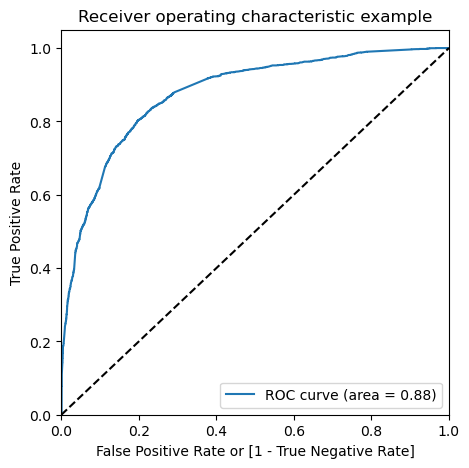

In [1362]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1363]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.124299,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.051178,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.180617,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.116465,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.705402,3241,1,1,1,1,1,1,1,1,1,0,0


In [1364]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.585573  0.964992  0.351461
0.2   0.2  0.729687  0.920923  0.611690
0.3   0.3  0.793494  0.836079  0.767217
0.4   0.4  0.804338  0.751647  0.836849
0.5   0.5  0.808109  0.692751  0.879288
0.6   0.6  0.790193  0.574959  0.922999
0.7   0.7  0.778878  0.500824  0.950445
0.8   0.8  0.743674  0.373558  0.972046
0.9   0.9  0.711143  0.263591  0.987294


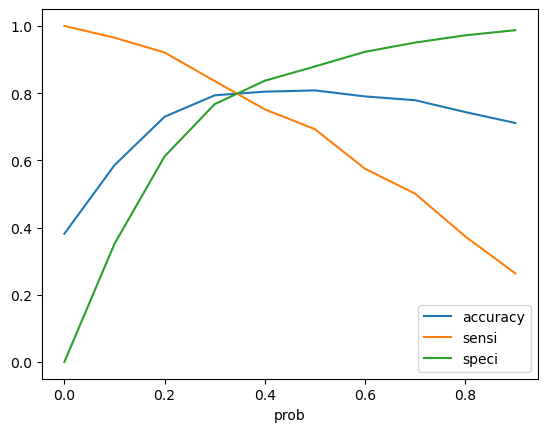

In [1365]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1366]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.124299,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.051178,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.180617,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.116465,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.705402,3241,1,1,1,1,1,1,1,1,1,0,0,1


In [1367]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7934936350777935

In [1368]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3019,  916],
       [ 398, 2030]])

In [1369]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Senstivity : ", TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting Conversion when customer has not Converted
print("False postive rate : ", FP/ float(TN+FP))
      
# Positive predictive value 
print ("Positive predictive value : ", TP / float(TP+FP))
      
# Negative predictive value
print ("Negative predictive value : ", TN / float(TN+ FN))

Senstivity :  0.8360790774299836
Specificity :  0.7672172808132147
False postive rate :  0.23278271918678525
Positive predictive value :  0.6890699253224711
Negative predictive value :  0.8835235586772022


## Precision and Recall

In [1371]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3460,  475],
       [ 746, 1682]])

##### Precision
TP / TP + FP

In [1372]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7797867408437645

##### Recall
TP / TP + FN

In [1373]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6927512355848435

In [1374]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [1375]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

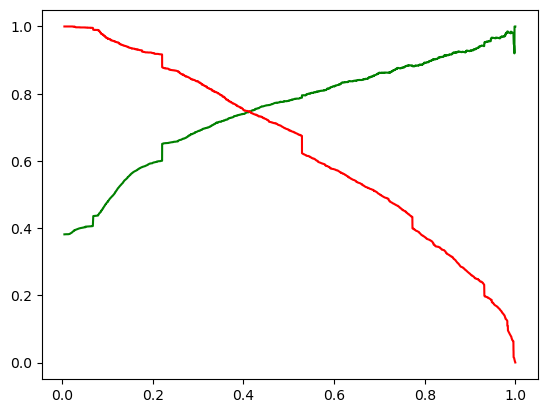

In [1376]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

In [1377]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.427 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.124299,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.051178,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.180617,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.116465,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.705402,3241,1,1,1,1,1,1,1,1,1,0,0,1


In [1378]:
# Let's check the overall accuracy again with new CutOff
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8087380166588087

In [1379]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3354,  581],
       [ 636, 1792]])

In [1380]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Senstivity : ", TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting Conversion when customer has not Converted
print("False postive rate : ", FP/ float(TN+FP))
      
# Positive predictive value 
print ("Positive predictive value : ", TP / float(TP+FP))
      
# Negative predictive value
print ("Negative predictive value : ", TN / float(TN+ FN))

Senstivity :  0.7380560131795717
Specificity :  0.8523506988564168
False postive rate :  0.14764930114358324
Positive predictive value :  0.7551622418879056
Negative predictive value :  0.8406015037593985


### Observations :-

- Accuracy of >80% means more than 80% of the labels are predicted correctly.
- Higher Sensitivity means that the Actually converted leads are being captured better.
- Higher Specificity means that we are able to identify True negataives in a better way, in this case study it means leads which are not converting, hence the sales team will sepnd less time on the same.
- Low False Positive Rate means % of cases highlighted as hot but are actually not hot for conversion, the lower it the better.
- Higher Positive Predictive value means it is capturing the actual hot leads properly out of the total hot leads predicted
- higher Negative Predicitve Value means it is capturing the Non-Hot/Cold Leads properly out of the total Cold Leads predicted.


## Making predictions on the test set

In [1382]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1385]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm3.columns

X_test=X_test[X_train_sm3.columns]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 6906 to 6219
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Do Not Email                                          2727 non-null   int64  
 2   Total Time Spent on Website                           2727 non-null   float64
 3   Lead Origin_Lead Add Form                             2727 non-null   uint8  
 4   Lead Source_Olark Chat                                2727 non-null   uint8  
 5   Lead Source_Welingak Website                          2727 non-null   uint8  
 6   Last Activity_Had a Phone Conversation                2727 non-null   uint8  
 7   Last Activity_Olark Chat Conversation                 2727 non-null   uint8  
 8   Last Activity_SMS Sent                                2

Making the Prediction Using Final Model

In [1388]:
# Predicting on test data set using final model :-

y_test_pred = res3.predict(X_test)

y_test_pred[:10]

6906    0.879485
1873    0.331497
771     0.086710
4495    0.102992
9061    0.754878
4929    0.445790
2308    0.151582
1034    0.081323
9033    0.086079
7008    0.894128
dtype: float64

In [1389]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head

y_pred_1.head()

,0
6906,0.879485
1873,0.331497
771,0.086710
4495,0.102992
9061,0.754878


In [1394]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1395]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1396]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1397]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.879485
1,0,0.331497
2,0,0.086710
3,0,0.102992
4,1,0.754878


In [1399]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.879485
1,0,0.331497
2,0,0.086710
3,0,0.102992
4,1,0.754878


In [1400]:
# Make predictions on the test set using 0.427 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.427 else 0)

In [1401]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.879485,1
1,0,0.331497,0
2,0,0.086710,0
3,0,0.102992,0
4,1,0.754878,1


In [1402]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8056472313898057

In [1403]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1414,  246],
       [ 284,  783]])

In [1404]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1405]:
# Calculate Precision

TP/(TP+FP)

0.760932944606414

In [1406]:
# Calculate Recall

TP/(TP+FN)

0.7338331771321462